<a href="https://colab.research.google.com/github/osama-m-taha/FaceRecognition/blob/main/FaceRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install keras-facenet
!pip install tensorflow
!pip install keras
!pip install preprocessing
!pip install image
!pip install mtcnn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import math
import cv2

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
%ls

dataset.npz  embeddings.npz  FaceRecognition.ipynb  img_dataset/


In [ ]:
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

0.1.0


# Face Detection

In [ ]:
# demonstrate face detection on 5 Celebrity Faces Dataset
from os import listdir
from PIL import Image
from numpy import asarray
from matplotlib import pyplot
from mtcnn.mtcnn import MTCNN
from keras_facenet import FaceNet
from os import listdir
from os.path import join
import os
embedder = FaceNet()


In [ ]:
# load image from file
image = Image.open('./img_dataset/AL-Limby/El-Lemby004.jpg')
# convert to RGB, if needed
image = image.convert('RGB')
# convert to array
image = asarray(image)

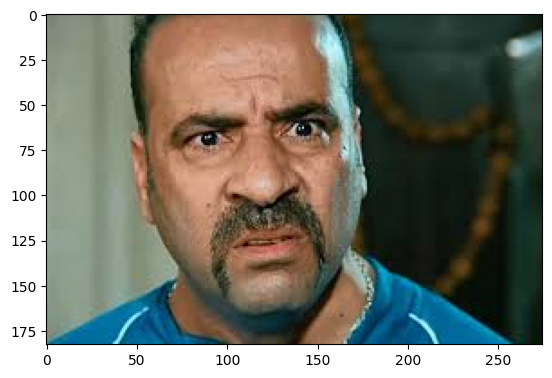

(183, 275, 3)

In [ ]:
plt.imshow(image)
plt.show()
image.shape

In [ ]:
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
results = detector.detect_faces(image)

1/1 [==============================] - 0s 203ms/step


In [ ]:
results

[{'box': [57, 4, 113, 158],
  'confidence': 0.9998849630355835,
  'keypoints': {'left_eye': (89, 68),
   'right_eye': (142, 62),
   'nose': (121, 98),
   'mouth_left': (99, 122),
   'mouth_right': (143, 118)}}]

In [ ]:
# extract the bounding box from the first face
x1, y1, width, height = results[0]['box']
# bug fix
x1, y1 = abs(x1), abs(y1)
x2, y2 = x1 + width, y1 + height

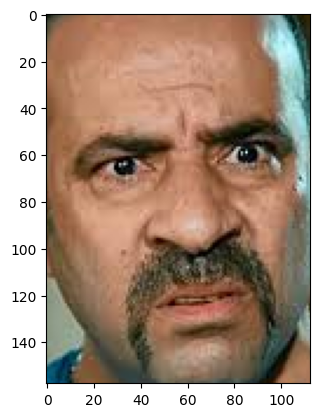

(158, 113, 3)


In [ ]:
# extract the face
face = image[y1:y2, x1:x2]
plt.imshow(face)
plt.show()
print(face.shape)

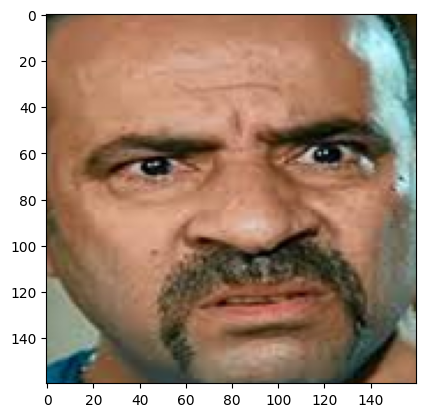

(160, 160, 3)


In [ ]:
# resize pixels to the model size
image = Image.fromarray(face)
image = image.resize((160, 160))
face_array = asarray(image)
plt.imshow(face_array)
plt.show()
print(face_array.shape)

1/1 [==============================] - 0s 146ms/step


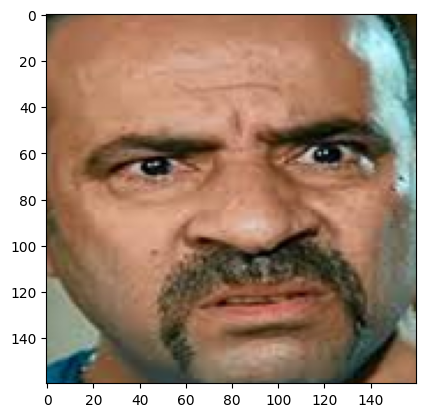

(160, 160, 3)


In [ ]:
# extract a single face from a given photograph
def extract_face(filename, required_size=(160, 160)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    # deal with negative pixel index
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    return face_array

# load the photo and extract the face
pixels = extract_face('./img_dataset/AL-Limby/El-Lemby004.jpg')
plt.imshow(pixels)
plt.show()
print(pixels.shape)

# Loading Model

In [ ]:
def load_face(dir):
  faces = list()
  # enumerate files
  for filename in os.listdir(dir):
    path = dir + filename
    print(path)
    face = extract_face(path)
    faces.append(face)
  return faces
def load_dataset(dir):
  # list for faces and labels
  X, y = list(), list()
  for subdir in os.listdir(dir):
    print(subdir)
    path = dir + subdir + '/'
    faces = load_face(path)
    labels = [subdir for i in range(len(faces))]
    print("loaded %d sample for class: %s" % (len(faces),subdir) ) # print progress
    X.extend(faces)
    y.extend(labels)
  return np.asarray(X), np.asarray(y)
# load dataset
dir = "./img_dataset/"
# All Dataset
X, y = load_dataset(dir)
print(X.shape, y.shape)

Tony_Blair
./img_dataset/Tony_Blair/Tony_Blair_0010.jpg
1/1 [==============================] - 0s 246ms/step
./img_dataset/Tony_Blair/Tony_Blair_0005.jpg
1/1 [==============================] - 0s 144ms/step
./img_dataset/Tony_Blair/Tony_Blair_0007.jpg
1/1 [==============================] - 0s 145ms/step
./img_dataset/Tony_Blair/Tony_Blair_0001.jpg
1/1 [==============================] - 0s 139ms/step
./img_dataset/Tony_Blair/Tony_Blair_0008.jpg
1/1 [==============================] - 0s 148ms/step
./img_dataset/Tony_Blair/Tony_Blair_0006.jpg
1/1 [==============================] - 0s 192ms/step
./img_dataset/Tony_Blair/Tony_Blair_0003.jpg
1/1 [==============================] - 0s 194ms/step
./img_dataset/Tony_Blair/Tony_Blair_0002.jpg
1/1 [==============================] - 0s 228ms/step
./img_dataset/Tony_Blair/Tony_Blair_0004.jpg
1/1 [==============================] - 0s 140ms/step
./img_dataset/Tony_Blair/Tony_Blair_0009.jpg
1/1 [==============================] - 0s 152ms/step
loaded 10

Spliting the dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, shuffle=True, random_state = 42)
print(trainX.shape, trainy.shape)
print(testX.shape, testy.shape)

# save and compress the dataset for further use
np.savez_compressed('dataset.npz', trainX, trainy, testX, testy)

(80, 160, 160, 3) (80,)
(20, 160, 160, 3) (20,)


In [ ]:
# load the face dataset
data = np.load('dataset.npz')
trainX, trainy, testX, testy = data['arr_0'], data['arr_1'], data['arr_2'], data['arr_3']
print('Loaded: ', trainX.shape, trainy.shape, testX.shape, testy.shape)

Loaded:  (80, 160, 160, 3) (80,) (20, 160, 160, 3) (20,)


In [ ]:
from keras_facenet import FaceNet

embedder = FaceNet()
# get the face embedding for one face
facenet_model=embedder.model

In [ ]:
def get_embedding(model, face):
    # scale pixel values
    face = face.astype('float32')
    # standardization
    mean, std = face.mean(), face.std()
    face = (face-mean)/std
    # transfer face into one sample (3 dimension to 4 dimension)
    sample = np.expand_dims(face, axis=0)
    # make prediction to get embedding
    yhat = model.predict(sample)
    return yhat[0]

# convert each face in the train set into embedding
emdTrainX = list()
for face in trainX:
    emd = get_embedding(facenet_model, face)
    emdTrainX.append(emd)

emdTrainX = np.asarray(emdTrainX)
print(emdTrainX.shape)

# convert each face in the test set into embedding
emdTestX = list()
for face in testX:
    emd = get_embedding(facenet_model, face)
    emdTestX.append(emd)
emdTestX = np.asarray(emdTestX)
print(emdTestX.shape)

# save arrays to one file in compressed format
np.savez_compressed('embeddings.npz', emdTrainX, trainy, emdTestX, testy)

1/1 [==============================] - 0s 86ms/step
(80, 512)
1/1 [==============================] - 0s 88ms/step
(20, 512)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.svm import SVC

print("Dataset: train=%d, test=%d" % (emdTrainX.shape[0], emdTestX.shape[0]))
# normalize input vectors
in_encoder = Normalizer()
emdTrainX_norm = in_encoder.transform(emdTrainX)
emdTestX_norm = in_encoder.transform(emdTestX)
# label encode targets
out_encoder = LabelEncoder()
out_encoder.fit(trainy)
trainy_enc = out_encoder.transform(trainy)
testy_enc = out_encoder.transform(testy)
# fit model
model = SVC(kernel='linear', probability=True)
model.fit(emdTrainX_norm, trainy_enc)
# predict
yhat_train = model.predict(emdTrainX_norm)
yhat_test = model.predict(emdTestX_norm)
# score
score_train = accuracy_score(trainy_enc, yhat_train)
score_test = accuracy_score(testy_enc, yhat_test)
# summarize
print('Accuracy: train=%.3f, test=%.3f' % (score_train*100, score_test*100))

Dataset: train=80, test=20
Accuracy: train=100.000, test=100.000


# Face Recognition

Randomly select a face from test set for prediction. Calculate confidence

Predicted: 
['AL-Limby' 'Ahmed Helmy' 'Colin_Powell' 'Donald_Rumsfeld' 'George_W_Bush'
 'Gerhard_Schroeder' 'Hugo_Chavez' 'Jacques_Chirac' 'Tony_Blair'
 'Vladimir_Putin'] 
[ 3.65265543  2.25040988  4.58958505 50.46795677  8.7414225   8.1731915
  2.93815913  3.50474318  9.12834507  6.55353151]
Expected: Donald_Rumsfeld


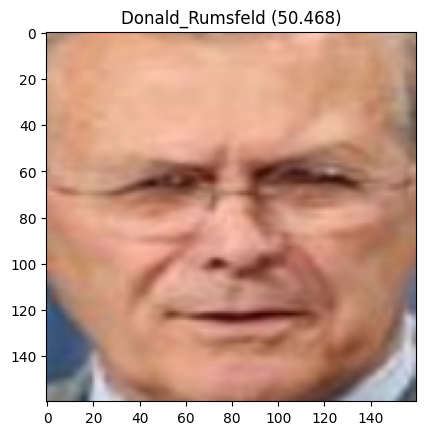

In [ ]:
from random import choice
# select a random face from test set
selection = choice([i for i in range(testX.shape[0])])
random_face = testX[selection]
random_face_emd = emdTestX_norm[selection]
random_face_class = testy_enc[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = np.expand_dims(random_face_emd, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
all_names = out_encoder.inverse_transform(list(range(10)))
#print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Predicted: \n%s \n%s' % (all_names, yhat_prob[0]*100))
print('Expected: %s' % random_face_name[0])
# plot face
plt.imshow(random_face)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()

Choose a well know image from testy images

In [ ]:
#
testy

array(['Colin_Powell', 'Hugo_Chavez', 'Jacques_Chirac',
       'Gerhard_Schroeder', 'Gerhard_Schroeder', 'Vladimir_Putin',
       'Donald_Rumsfeld', 'Colin_Powell', 'George_W_Bush', 'Tony_Blair',
       'George_W_Bush', 'Vladimir_Putin', 'Jacques_Chirac',
       'Vladimir_Putin', 'Ahmed Helmy', 'Tony_Blair', 'Jacques_Chirac',
       'Jacques_Chirac', 'George_W_Bush', 'Vladimir_Putin'], dtype='<U17')

Predicted: 
['AL-Limby' 'Ahmed Helmy' 'Colin_Powell' 'Donald_Rumsfeld' 'George_W_Bush'
 'Gerhard_Schroeder' 'Hugo_Chavez' 'Jacques_Chirac' 'Tony_Blair'
 'Vladimir_Putin'] 
[ 6.46163457  4.88205739  1.74598004  5.68685203 59.30687099  5.34366792
  2.63913671  4.36580086  2.34491498  7.22308451]
Expected: George_W_Bush


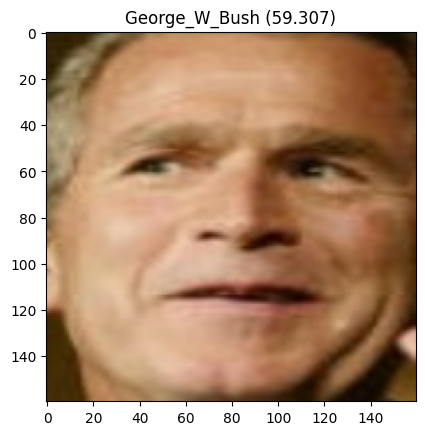

In [ ]:
selection = 10
random_face = testX[selection]
random_face_emd = emdTestX_norm[selection]
random_face_class = testy_enc[selection]
random_face_name = out_encoder.inverse_transform([random_face_class])

# prediction for the face
samples = np.expand_dims(random_face_emd, axis=0)
yhat_class = model.predict(samples)
yhat_prob = model.predict_proba(samples)
# get name
class_index = yhat_class[0]
class_probability = yhat_prob[0,class_index] * 100
predict_names = out_encoder.inverse_transform(yhat_class)
all_names = out_encoder.inverse_transform(list(range(10)))
#print('Predicted: %s (%.3f)' % (predict_names[0], class_probability))
print('Predicted: \n%s \n%s' % (all_names, yhat_prob[0]*100))
print('Expected: %s' % random_face_name[0])
# plot face
plt.imshow(random_face)
title = '%s (%.3f)' % (predict_names[0], class_probability)
plt.title(title)
plt.show()

# Face Verification

Same Person

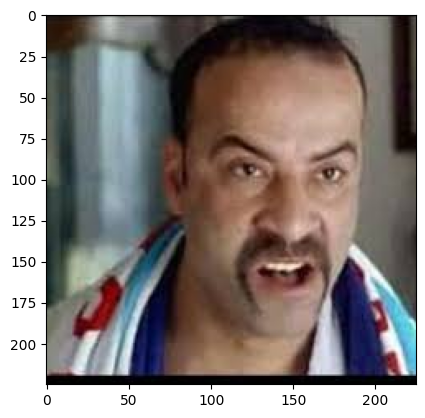

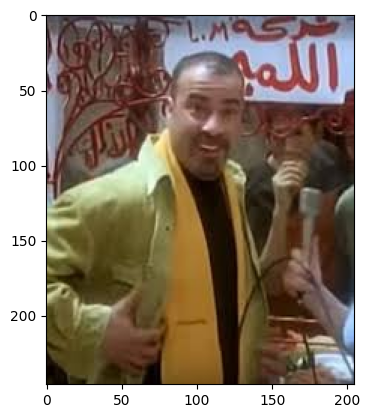

1/1 [==============================] - 0s 273ms/step
Same Person
0.45124387741088867


In [ ]:
ii="./img_dataset/AL-Limby/El-Lemby007.jpg"
jj="./img_dataset/AL-Limby/El-Lemby001.jpg"

# load image from file
image = Image.open(ii)
# convert to RGB, if needed
image = image.convert('RGB')
# convert to array
pixels = asarray(image)
plt.imshow(image)
plt.show()
# load image from file
image = Image.open(jj)
# convert to RGB, if needed
image = image.convert('RGB')
# convert to array
pixels = asarray(image)
plt.imshow(image)
plt.show()
detect_ii = embedder.extract(ii, threshold=0.95)
detect_jj = embedder.extract(jj, threshold=0.95)
dd = embedder.compute_distance(detect_ii[0]['embedding'], detect_jj[0]['embedding'])
if dd<.5:
  print('Same Person')
else:
  print('Not Same Person')
print(dd)


Not the same person

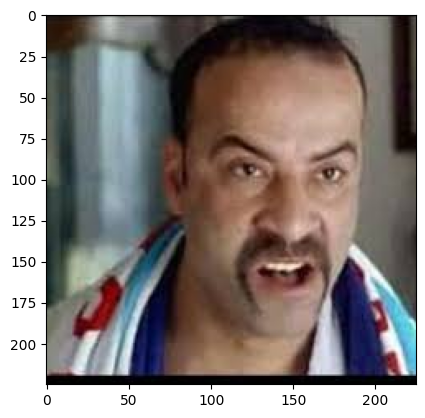

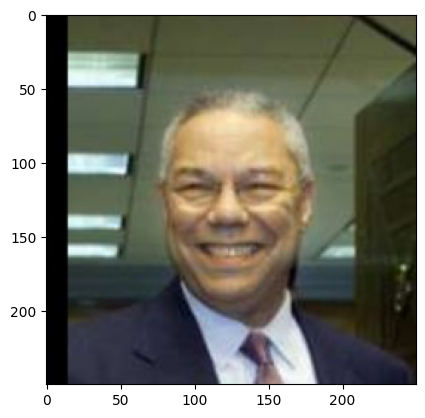

1/1 [==============================] - 0s 146ms/step
Not Same Person
0.9415538534522057


In [ ]:
ii="./img_dataset/AL-Limby/El-Lemby007.jpg"
jj="./img_dataset/Colin_Powell/Colin_Powell_0004.jpg"

# load image from file
image = Image.open(ii)
# convert to RGB, if needed
image = image.convert('RGB')
# convert to array
pixels = asarray(image)
plt.imshow(image)
plt.show()
# load image from file
image = Image.open(jj)
# convert to RGB, if needed
image = image.convert('RGB')
# convert to array
pixels = asarray(image)
plt.imshow(image)
plt.show()
detect_ii = embedder.extract(ii, threshold=0.95)
detect_jj = embedder.extract(jj, threshold=0.95)
dd = embedder.compute_distance(detect_ii[0]['embedding'], detect_jj[0]['embedding'])
if dd<.5:
  print('Same Person')
else:
  print('Not Same Person')
print(dd)
